# Milestone 1
Team: Sivatagi Rohamcsigák

Datasource: https://www.kaggle.com/competitions/landmark-recognition-2021/data

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://github.com/Bodesz11/Project_Deep_Learning/blob/main/Milestone_1.ipynb)

In [ ]:
# Imports
import os
import pandas as pd
import numpy as np
import random
import cv2

import matplotlib.pyplot as plt
import matplotlib.image as mpimg


from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator

## Reading the label data

In [ ]:
# Loading labels from csv
traindf = pd.read_csv("train.csv")
traindf.head()

,id,landmark_id
0,17660ef415d37059,1
1,92b6290d571448f6,1
2,cd41bf948edc0340,1
3,fb09f1e98c6d2f70,1
4,25c9dfc7ea69838d,7


In [ ]:
# Length of the training labels
print("Total unique label ids:", len(traindf['landmark_id'].unique()))

Total unique label ids: 81313


Ergo:  there are 81313 landmark classes, which is too much for this assignment. We will load only 50 for data preperation purpuses

Number of catergories: 81313
Number of images: 1580470
Avereage number of images per category: 19.436867413574706


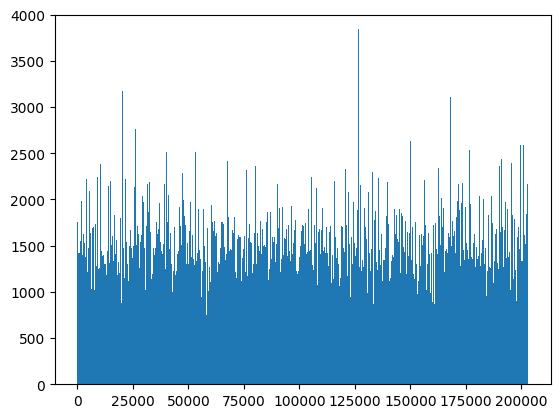

In [ ]:
print(f"Number of catergories: {len(set(traindf['landmark_id'].to_list()))}")
print(f"Number of images: {len(set(traindf['id'].to_list()))}")
print(f"Avereage number of images per category: {len(set(traindf['id'].to_list())) / len(set(traindf['landmark_id'].to_list()))}")
plt.hist(traindf['landmark_id'].to_list(), bins = 1000)
plt.ylim((0,4000))
plt.show()

The training data is well structured, and well distributed along the 200k categories<br>
The almost uniform distribution will amke the training easier

We just read the first 50 landmark categories

In [ ]:
image_ids = []
labels = []
temp_labels = []
i=0
for id_ in landmark_unique[0:50]:
    for iid in traindf['id'][traindf['landmark_id'] == id_]:
        image_ids.append(iid)
        labels.append(id_)
        temp_labels.append(i)
    i = i+1
len(image_ids)

1144

## Showing some images from the dataset
We loaded only the first 50 categories, because for this part (visualizing, test model) it should be enough

In [ ]:
mainpath = '../input/landmark-recognition-2021/train'
image_path = []
images_pixels = []

# We have to create the directories for the pictures, we could also use os.listdir, but this was less complicated
for i in range(0,len(image_ids)):
    first_dir = os.path.join(mainpath,image_ids[i][0])
    second_dir = os.path.join(first_dir,image_ids[i][1])
    third_dir = os.path.join(second_dir,image_ids[i][2])
    finalpath = os.path.join(third_dir,image_ids[i]+'.jpg')

    img_pix = cv2.imread(finalpath,1)
    images_pixels.append(cv2.resize(img_pix, (100,100)))

    image_path.append(finalpath)

In [ ]:
# The 2 values shoud be the same
print('Images: ', len(image_path))
print('Image labels: ', len(labels))

Images:  1144
Image labels:  1144


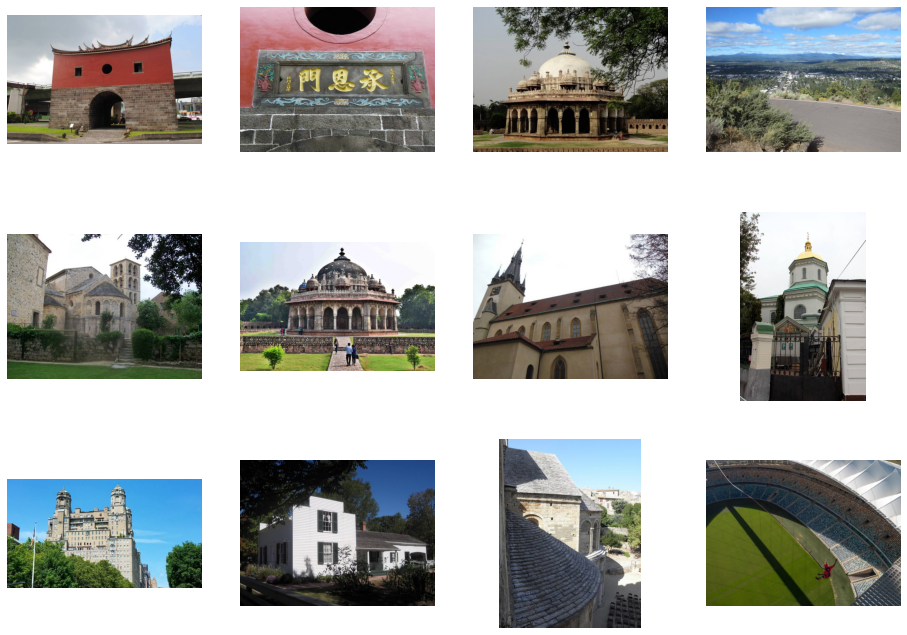

In [ ]:
fig = plt.gcf()
fig.set_size_inches(16, 16)
next_pix = image_path
random.shuffle(next_pix)
for i, img_path in enumerate(next_pix[0:12]):
    sp = plt.subplot(4, 4, i + 1)
    sp.axis('Off')
    img = mpimg.imread(img_path)
    plt.imshow(img)
plt.show()

In [ ]:
shuf = list(zip(images_pixels,temp_labels))
random.shuffle(shuf)

train_data, labels_data = zip(*shuf)
print('Images: ', len(train_data))
print('Image labels: ', len(labels_data))

Images:  1144
Image labels:  1144


## Cutting the data into train and validation parts

In [ ]:
X_data = np.array(train_data) / 255
Y_data =  to_categorical(labels_data, num_classes = 50)

In [ ]:
X_train, X_val, Y_train, Y_val = train_test_split(X_data, Y_data, test_size = 0.3, random_state=101)

print("X train data : ", len(X_train))
print("X label data : ", len(X_val))
print("Y val data : ", len(Y_train))
print("Y label data : ", len(Y_val))

X train data :  800
X label data :  344
Y test data :  800
Y label data :  344
